# 11. Container With Most Water

### Difficulty: <font color = orange> Medium </font>

---

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

---

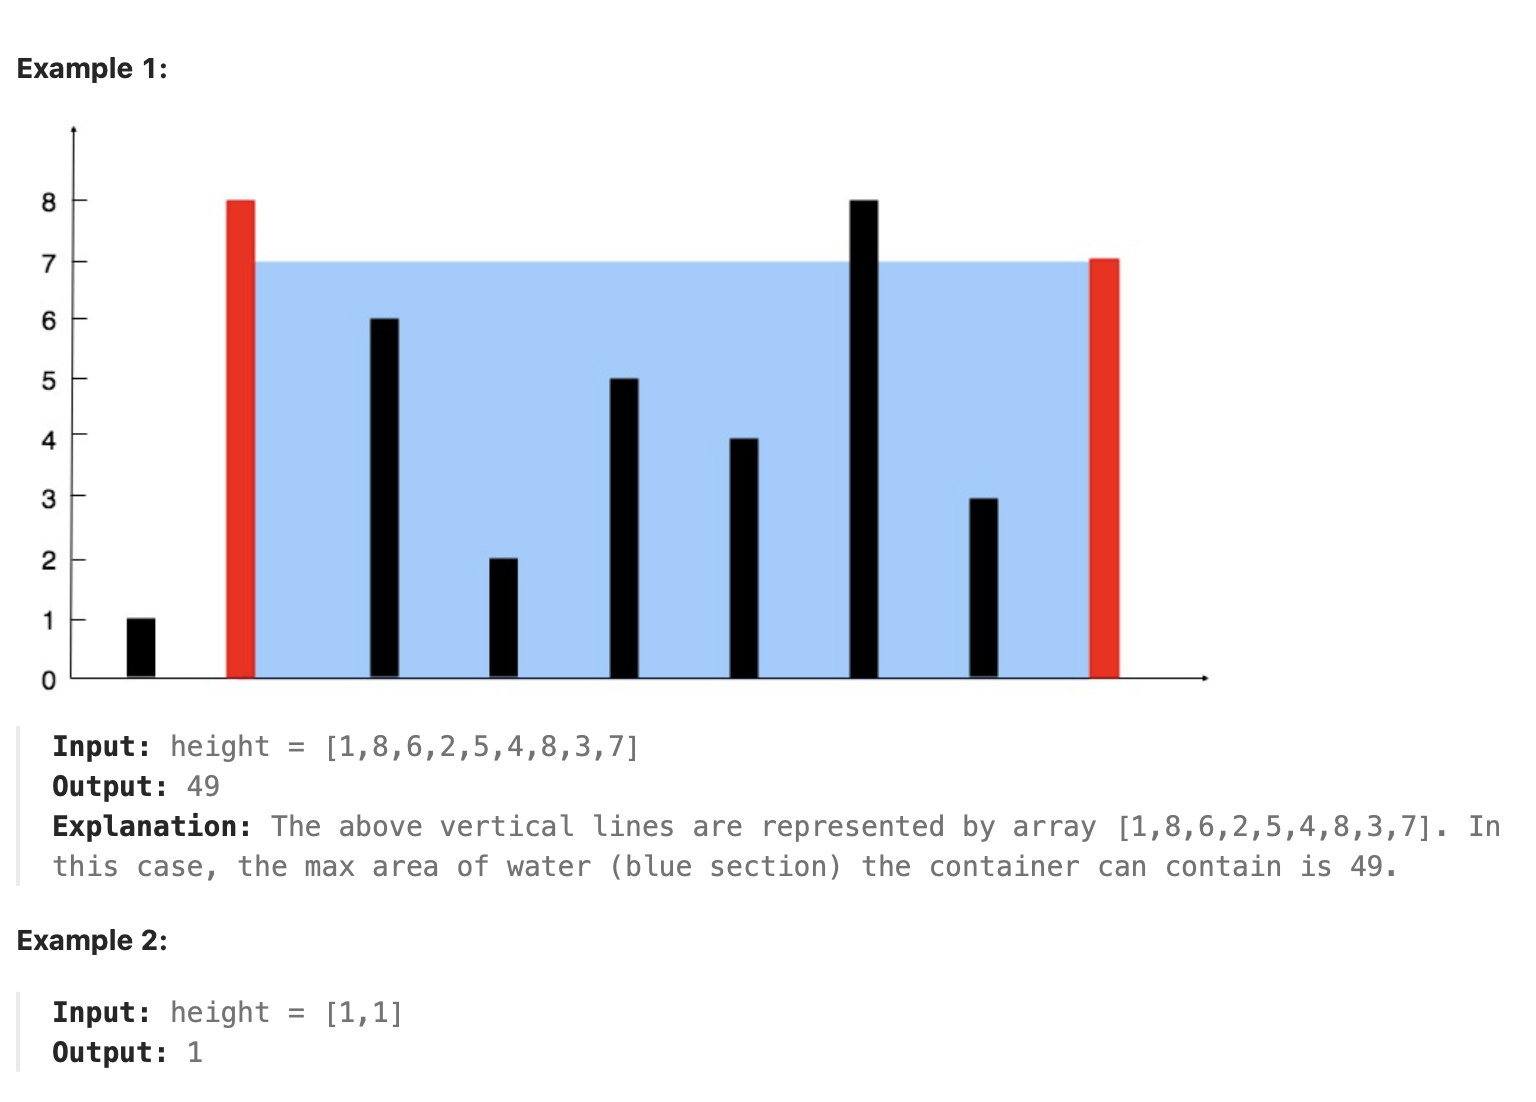

**Constraints:**

$n == height.length$

$2 <= n <= 105$

$0 <= height[i] <= 104$

# Approach: Scan through 'height' array in search of maximum area in one pass using Two Pointers 

## Approach Overview

Scan through `height` array in search of maximum area using two pointers (one at the end of the array and one at the start). For each iteration:

- Calculate the Area (Area = length x height)

- length_of_container = (right pointer - left pointer) and height_of_container = smallest value between `height[left]` and `height[right]` (so water doesn't spill)

- Check if current area is greater than the maximum area value we have seen so far 

- Update maximum area value (if needed)

- If $height[left]$ < $height[right]$ then increment left pointer 

- If $height[left]$ > $height[right]$ then decrement right pointer 

- return value of maximum area 

### Key Steps
1. Scan through `height` array using two pointers.

2. Calculate the area of current container (`Area = (right-left) * min(height[left], height[right]`).

3. Update value of maximum area seen so far (if needed) (`maxArea = max(maxArea, currentArea)`).

4. Decide which pointer we need to update (increment left if height at left < height at right, decrement right if height at left > height at right).

5. Return maximum area.

### Detailed Explanation

This problem was a real learning opportunity on the two pointers algorithm because to use this algo we usually need to sort the input array or have it already sorted, but in this case we didn't have that. The input height array wasn't sorted and if we sorted it, it would messed up our result. 

The input array comprises of a bunch of height values and we were asked to calculate the maximum area it can hold. And since the values is not sorted I was struggling to figure out the right criteria to use to update the pointers. At first I thought about doing it using the area value. 

My reasoning: If the current area is greater than the maximum area seen so far then decrement right pointer.
Else if current area is smaller than the maximum area seen so far increment left. 

PROBLEM with this is I'm not thinking deeply about which variable is responsible for maximizing the area. 

In fact I'm neglecting it altogether, I mean say I did find a new maximum area value inorder to stand the best chance to find an even bigger area, so I need to increment the pointer that has the smaller height (everytime). 

REMEMBER: Length of container is always decreasing as we traverse through the array so inorder to maximize area we need to ensure the height value is a big as possible. 

Okay back to my flawed logic, why did it flop? well because it's not a sound way to maximize area, since length of container is always decreasing, if i did find an area value that was the biggest so far, it doesnt make sense to decrement right pointer, what if the largest height corresponding to that area was located at the right pointer? To stand a chance to find an even bigger area we need to find an even bigger height, but if i decrement the right pointer I lose the chance to find an even bigger height that may have maximized the area even more.

So right approach is to **first and foremost** REALIZE that I should be trying to maximize the height. If the value of height at left is smaller than height at right, in next iteration we need to increment left pointer in search of a height that's bigger than the one at right inorder to find the maximum possible area!



In [1]:
class Solution:
    def maxArea(self, height: List[int]) -> int:
        
        # initializing left pointer (to point to first element in array)
        left = 0
        
        # initializing right pointer (to poin to last element in array)
        right = len(height) - 1
        
        # initializing maximum area (maximum area of water container can store)
        maxArea = 0
        
        # Use two pointers to move towards each other until they meet, optimizing the area at each step.
        while left < right:
            
            # compute the minimum height of container (that will hold and not spill water)
            currentHeight = min( height[left], height[right] )
            
            # compute current area of current container
            currentArea = (right - left) * currentHeight
            
            # check if we need to update the maximum area (is current area bigger than the current max area)
            maxArea = max(currentArea, maxArea)
            
            # increment left if height at left <= height at right
            if height[left] <=  height[right]:

                left += 1
            # decrement right if height at left > height at right
            else:
                right -= 1
        # Return maximum area
        return maxArea        

NameError: name 'List' is not defined

## Reflection Points

#### Challenges (Note down of aspects of the problem I found particularly challenging and why):  

Choosing the correct criteria (figuring out what is the main variable i need to maximize inorder to maximize the container area. Once I realized the height is the only variable i needed to maximize to maximize area then the problem becomes trivial. I was trying to compare current calculated area against current maximum area seen so far as the criteria to decide which pointer to update but it was flawed as this will never allow me to maximize area. the height the variable responsible for maximizing the area not the area value itself, maximize height maximize area.


#### Learning Points (Identification of any new techniques, algorithms, or data structures you learned or applied while solving the problem):

For two pointer algorithms we usually have to sort an input array of numbers inorder to find the right combination of values that sum up to a specific target value. Atleast that one use case of the algorithm. HOWEVER, sometimes inorder to solve for the desired result, our input array doesnt need to be sorted, if we can identify the right variable in the problem that we need to control inorder to reach our result. In this problem, since the length of the container was always going to decrease with each iteration, inorder to maximize the area value we needed to maximize the value of height. We neded to update our pointers accordingly based on the value of Height. One variable to maximize.
#### Complexity 

Time complexity: $O(n)$

Space complexity: $O(1)$